In [1]:
#import all required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv("gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#shape of dataset
df.shape

(2290, 6)

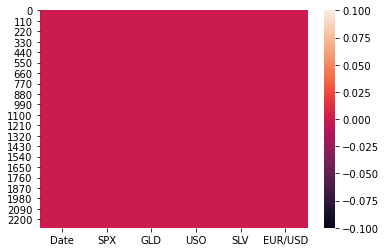

In [12]:
#vsualizing null value
sns.heatmap(df.isnull())
plt.show()

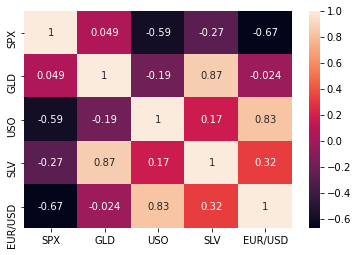

In [16]:
#visualizing corr between input and output
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
goldcorr=df.corr()

In [20]:
print(goldcorr["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


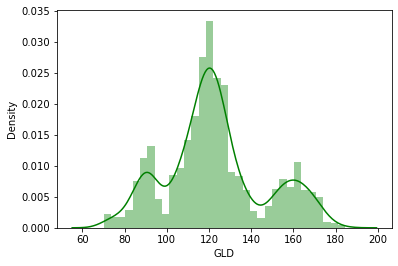

In [21]:
#visualizing distplot for gold
sns.distplot(df["GLD"],color="green")
plt.show()

In [22]:
#split input and output
x=df.drop(["Date","GLD"],axis=1)
y=df["GLD"]

In [24]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
#import linear regression
from sklearn.linear_model import LinearRegression

In [32]:
#creating object of linear regression
lr=LinearRegression()

In [33]:
#fit the data
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
lr.coef_

array([ 6.60445500e-03, -2.49395849e-01,  3.15074067e+00, -1.12598569e+01])

In [36]:
lr.intercept_

70.86433203680708

In [37]:
#predicting dataset
y_pred=lr.predict(x_test)

In [39]:
#import r2 score and mean_squred_error
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
mean_squared_error(y_test,y_pred)

65.77505613577559

In [41]:
#score is good but not excilent
r2_score(y_test,y_pred)

0.8760742535703908

In [42]:
#importing randomforestregressor for good score and prediction
from sklearn.ensemble import RandomForestRegressor

In [43]:
#creating randomforestregressor
rfr=RandomForestRegressor(n_estimators=100)

In [44]:
#fit data
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
#predicting data
y_pred=rfr.predict(x_test)

In [48]:
y_pred

array([113.53170008, 149.06970005, 139.36409763, 112.55300177,
       114.03679987,  95.53179947, 111.7257993 ,  93.30019934,
       120.77250123, 127.35879948, 147.94519983, 120.20759893,
       119.27840017,  88.11410073,  96.06490042,  92.79799857,
       116.50900064,  89.03309972, 125.23140089, 114.75160047,
       117.684199  , 152.81040244, 122.61159797, 120.51939998,
       171.10680111, 108.21549855, 120.65810071,  87.31759841,
        87.91810077,  88.58129939, 121.50920033, 154.55190147,
       145.16639788, 125.84290018, 126.10370045,  90.48729923,
       155.62639989, 121.46860012, 106.83030059, 142.80139883,
        92.5565997 , 127.64120069, 117.67330092, 152.7169002 ,
       119.23119951,  91.32340173,  80.17040013, 120.33050149,
       132.02929964, 119.19449976, 127.36810068, 165.89990078,
       153.5372018 ,  92.59469942, 148.83790096, 151.67079854,
       113.63230153, 113.23230111,  87.02719938, 127.81749917,
       124.92170027, 151.79500293, 114.64120002, 110.58

In [46]:
mean_squared_error(y_test,y_pred)

8.175224019786931

In [47]:
#randomforestregressor giving excilent score 0.98
r2_score(y_test,y_pred)

0.9845971892933084

In [50]:
#converting y_testinto list for visualization
y_test=list(y_test)

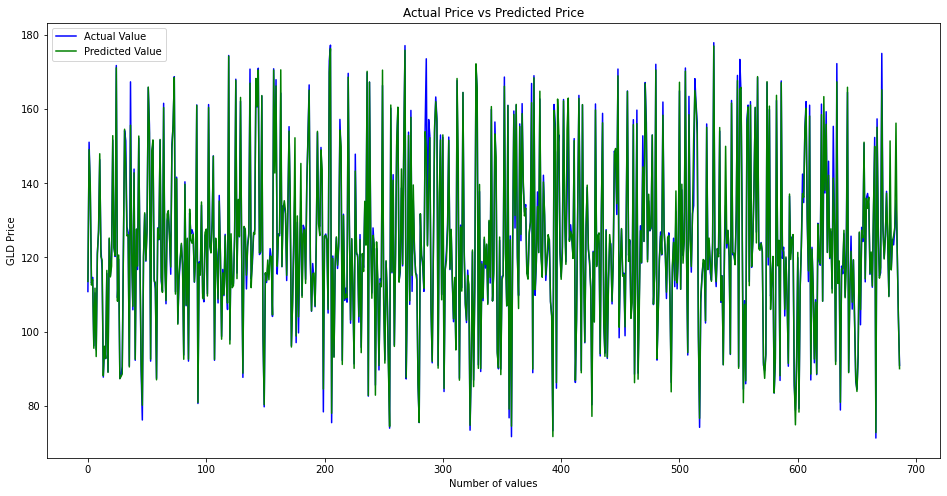

In [53]:
#visualizing Actual Price vs Predicted Price
plt.figure(figsize = (16,8))
plt.plt(y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()